In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
image=cv2.imread('friends_image_fav.jpg')

In [3]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

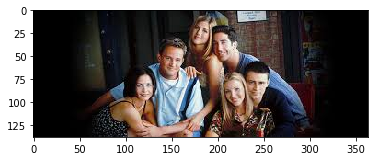

In [4]:
plt.imshow(image)
plt.show()

In [5]:
all_pixels=image.reshape(image.shape[0]*image.shape[1],image.shape[2])

In [7]:
from sklearn.cluster import KMeans


In [8]:
dominant_color=6
km=KMeans(n_clusters=dominant_color)

In [9]:
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
center=km.cluster_centers_

In [13]:
labels=km.labels_

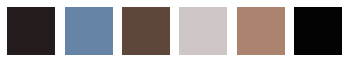

In [21]:
i=1
colors=[]
for each_col in center:
    plt.subplot(1,6,i)
    plt.axis('off')
    i+=1
    colors.append(each_col)
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
plt.show()

In [26]:
#Image segmentation
new_image=np.zeros((image.shape[0]*image.shape[1],image.shape[2]),dtype='uint8')
for i in range(new_image.shape[0]):
    new_image[i]=colors[labels[i]]


In [27]:
#Repaint the image
new_image=new_image.reshape(image.shape)

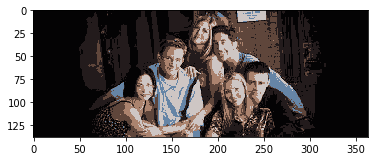

In [28]:
plt.imshow(new_image)
plt.show()